# Life Expectancy prediction with Polynomial Regression


In [25]:
#Author: Juan Camilo Pimienta Gomez

### This code implements a prediction for life expectancy in 235 countries until 2030 using Poilynomial Regression.

In [1]:
#imports needed to analize the data
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import log
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from scipy import stats

## Importing csv into a DataFrame (this data set comes from OurWorldInData.com)

In [2]:
years = list(range(1990,2020))
dfLE = pd.read_csv('life-expectancy.csv')
dfLE.head()


,Entity,Code,Year,Life expectancy at birth (historical)
0,Afghanistan,AFG,1950,27.7
1,Afghanistan,AFG,1951,28.0
2,Afghanistan,AFG,1952,28.4
3,Afghanistan,AFG,1953,28.9
4,Afghanistan,AFG,1954,29.2


## Checking that all countries have a sufficient amount of data to make a regression (at least 50 values each country)

In [3]:
#Cleaning data set from N/A values
dfLE = dfLE[dfLE['Code'].notna()]
countries = dfLE['Code'].unique()

numberOfCountriesProcessed= []

for country in countries:
    newCountry = dfLE[(dfLE['Code'] == country)]
    if (len(newCountry) > 50) :
        numberOfCountriesProcessed.append(newCountry.iloc[0]['Entity'])

print('Number of Countries with more than 50 values: ', len(numberOfCountriesProcessed))
print('Number of Countries on the original DataFrame ', len(countries))

Number of Countries with more than 50 values:  238
Number of Countries on the original DataFrame  238


## We are going to process JAPAN for this example

C:\Users\jucap\AppData\Local\Temp\ipykernel_10372\1646724997.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x1,y1,'go-', label = 'line 1', linewidth = 1 , color = 'blue')


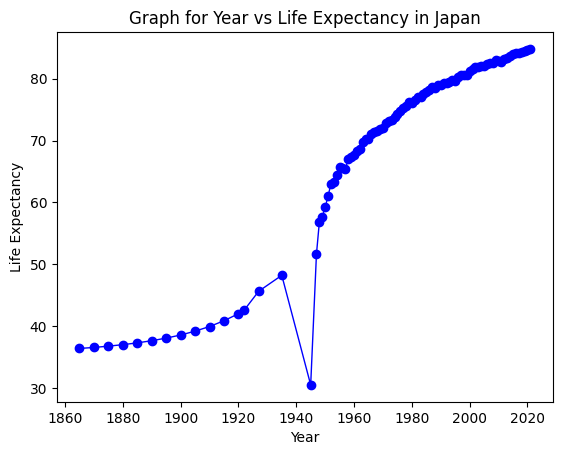

In [4]:
code = 'JPN'
dfLEJP =  dfLE[(dfLE['Code'] == 'JPN')]
#dfLEJP.head()

x1 = dfLEJP['Year'].values
y1 = dfLEJP['Life expectancy at birth (historical)'].values
#newDF.tail()
plt.plot(x1,y1,'go-', label = 'line 1', linewidth = 1 , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Graph for Year vs Life Expectancy in Japan')
plt.show()


### With the previous graphic we can see that there are values that can affect the accuracy of our prediction

## For that reason, we are going to clean the data set using the Z-score standard by checking the standard deviation for each point 

In [16]:
dfLE2 = dfLE
dfLE2 = dfLE2[(dfLE2['Code'] == code)]
dfLE2 = dfLE2[dfLE2['Year'] > 1900]
dfLE2['LE zscore'] = stats.zscore(dfLE2['Life expectancy at birth (historical)'])
dfLE2 = dfLE2[(dfLE2['LE zscore'] > -3) & (dfLE2['LE zscore'] < 3)]

C:\Users\jucap\AppData\Local\Temp\ipykernel_10372\2753222243.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(dfLE2['Year'].values,dfLE2['Life expectancy at birth (historical)'].values,'go-', label = 'line 1', linewidth = 1 , color = 'blue')


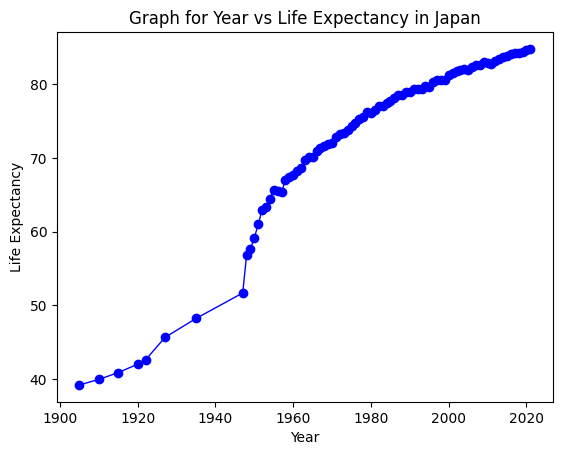

In [17]:
plt.plot(dfLE2['Year'].values,dfLE2['Life expectancy at birth (historical)'].values,'go-', label = 'line 1', linewidth = 1 , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Graph for Year vs Life Expectancy in Japan')
plt.show()

## Right after this, we are going to create a degree 2 polynomial this because the behavior of the graph, a simple linear regression is not enough.

In [18]:
x = dfLE2['Year'].values
y = dfLE2['Life expectancy at birth (historical)'].values
        
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
    
x = x.reshape(-1,1)
x_poly = poly_features.fit_transform(x)

### Now that our data in the X axis has been converted into a degree 2 polynomial, we can apply a LinearRegression object and predict (until 2030 for our example)

In [19]:
reg = LinearRegression()
reg.fit(x_poly, y)

x_vals = list(range(2022,2030))
x_vals = np.array(x_vals)
x_vals = x_vals.reshape(-1,1)

x_vals_poly = poly_features.transform(x_vals)

y_vals = reg.predict(x_vals_poly)

### Finally we are going to insert the new values and clean up the dataframe 

In [20]:
for idx, x in enumerate(range(2022,2030)):
    newColumn = [dfLE2.iloc[1]['Entity'], code, x, y_vals[idx]]
    dfLE2 = dfLE2.append(pd.Series(newColumn, index=dfLE2.columns[:len(newColumn)]), ignore_index=True)
del dfLE2['LE zscore']

C:\Users\jucap\AppData\Local\Temp\ipykernel_10372\365287430.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfLE2 = dfLE2.append(pd.Series(newColumn, index=dfLE2.columns[:len(newColumn)]), ignore_index=True)


### Let's see the final result

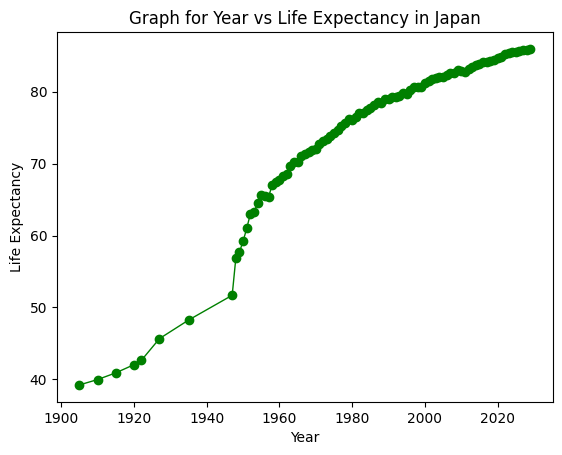

In [21]:
x1 = dfLE2['Year'].values
y1 = dfLE2['Life expectancy at birth (historical)'].values
dfLE2.tail()
plt.plot(x1,y1,'go-', label = 'line 1', linewidth = 1)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Graph for Year vs Life Expectancy in Japan')
plt.show()

## Predicted values

In [23]:
dfLE2.tail(10)

,Entity,Code,Year,Life expectancy at birth (historical)
80,Japan,JPN,2020,84.700000
81,Japan,JPN,2021,84.800000
82,Japan,JPN,2022,85.272959
83,Japan,JPN,2023,85.388239
84,Japan,JPN,2024,85.497840
85,Japan,JPN,2025,85.601761
86,Japan,JPN,2026,85.700001
87,Japan,JPN,2027,85.792561
88,Japan,JPN,2028,85.879441
89,Japan,JPN,2029,85.960641
